# Problem Set: Risk Measures with Stochastic Volatility Models

## Introduction

In this problem set, you will implement and compare two different approaches for estimating financial risk measures:

1. Kalman Filter with Maximum Likelihood Estimation (MLE)
2. EGARCH model

You will use these methods to compute two important risk metrics:
- Value-at-Risk (VaR)
- Expected Shortfall (ES)


## Learning Objectives

- Understand how to implement a Kalman Filter for stochastic volatility models
- Apply Maximum Likelihood Estimation (MLE) for parameter optimization
- Compare the Kalman Filter approach with EGARCH models
- Implement and interpret Value-at-Risk (VaR) and Expected Shortfall (ES)
- Assess model performance using coverage ratio analysis

## Requirements

The following libraries are needed for this problem set:

In [1]:
# Import necessary libraries
import numpy as np


## Part 1: Simulate Data from a Stochastic Volatility Model

We'll start by generating simulated data from a stochastic volatility (SV) model. This will allow us to evaluate the performance of our estimation methods against known "ground truth" parameters.

### Task 1.0 Model Specification

Write down the data generating process (DGP) for the SV model we'll use here (use the notation from lecture):


Define every symbol that shows up in the DGP:

### Task 1.1: Simulate SV data

Simulate data from an SV model that fullfils the following specifications:

(a) set the seed to 1234

(b) use a sample size of 2500

(c) model parameters: 0.95 for volatility persistence; 0.2 for "vol of vol"; set the unconditional vol to 1.0. 

(d) initialize the very first element of the latent vol process with its unconditional distribution (see lecture)

(e) plot the simulated return series

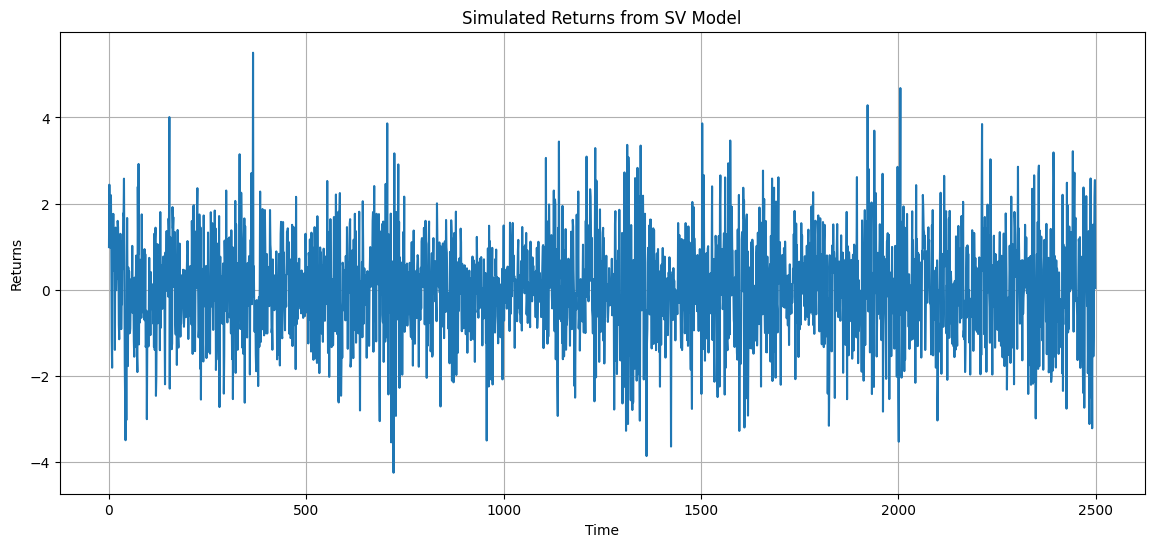

In [17]:
import matplotlib.pyplot as plt

# Plot the simulated returns
plt.figure(figsize=(14, 6))
plt.plot(r)
plt.title('Simulated Returns from SV Model')
plt.xlabel('Time')
plt.ylabel('Returns')
plt.grid(True)
plt.show()

## Part 2: Kalman Filter Implementation

To estimate the SV model, we need to linearize it first using the Harvey Transform.

### Task 2.0 The Harvey Transform

Explain step by step the Harvey transform and state the transformed DGP (see lecture).

### Task 2.1: Implement the Kalman Filter

Implement the Kalman filter estimation routine using the following specification:

(a) function is called kalman_filter. its input is (y, a, B, Phi, H, Q, a1, P1, return_loglike=False) (notation follows lecture). its output is the negative log-likelihood if return_loglike=True and the time series for [posterior mean, posterior variance, prior mean, prior variance] if return_loglike=False. 



In [19]:
def kalman_filter(y, a, B, Phi, H, Q, a1, P1, return_loglike=False):
    T = len(y)

    # Initialize
    filtered_means = np.zeros(T)
    filtered_vars = np.zeros(T)
    prior_means = np.zeros(T)
    prior_vars = np.zeros(T)

    pred_mean = a1
    pred_var = P1
    loglike = 0

    for t in range(T):
        # Kalman gain
        K = pred_var * B / (B * pred_var * B + H)

        # Prediction error
        v = y[t] - (a + B * pred_mean)

        # Update posterior
        updated_mean = pred_mean + K * v
        updated_var = (1 - K * B) * pred_var

        # Store
        filtered_means[t] = updated_mean
        filtered_vars[t] = updated_var
        prior_means[t] = pred_mean
        prior_vars[t] = pred_var

        # Log-likelihood contribution
        if return_loglike:
            F_t = B * pred_var * B + H
            loglike += 0.5 * (np.log(2 * np.pi) + np.log(F_t) + (v**2) / F_t)

        # Predict next state
        pred_mean = a + Phi * updated_mean
        pred_var = Phi * updated_var * Phi + Q

    if return_loglike:
        return loglike
    else:
        return filtered_means, filtered_vars, prior_means, prior_vars
